In [163]:
%matplotlib inline
import numpy as np              
import pandas as pd
from sklearn import preprocessing
import math
# Set charts to view inline
%matplotlib inline
# Required Python Machine learning Packages
import pandas as pd
import numpy as np

# To split the dataset into train and test datasets
from sklearn.model_selection import train_test_split

# To model the Gaussian Navie Bayes classifier
from sklearn.naive_bayes import GaussianNB

# To calculate the accuracy score of the model
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# function that checks if the variable is a float
def isFloat(string):
    try:
        float(string)
        return True
    except ValueError:
        return False

In [3]:
df = pd.read_csv("master.csv")
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [ ]:
df.describe()

## check for missing values

In [ ]:
# detect values that are NaN in each row
df.isnull().sum()

there are no missing values


since the data for HDI for year is a column completely without data, we choose to drop the whole column

In [ ]:
df.drop(columns=['HDI for year'])

## clean data

first we check if all categorical data are typed correctly and are the correct amount of categories

In [ ]:
df["country"].value_counts()

In [ ]:
df["sex"].value_counts()

In [ ]:
df["age"].value_counts()

In [ ]:
df["generation"].value_counts()

next we check if all nummerical (continuous data) are numerical and string data are type string (gdp_for_year ($))

In [ ]:
for val in df["year"]:
    if not str(val).isdigit():
        print(val)

In [ ]:
for val in df["suicides_no"]:
    if not str(val).isdigit():
        print(val)

In [ ]:
for val in df["population"]:
    if not str(val).isdigit():
        print(val)

In [ ]:
for val in df["suicides/100k pop"]:
    if not isFloat(val):
        print(val)

In [ ]:
for val in df[" gdp_for_year ($) "]:
    res = type(val) == str
    if res == False:
        print(res)    

In [ ]:
for val in df["gdp_per_capita ($)"]:
    if not str(val).isdigit():
        print(val)

## Box plot check for outliers

although there might seem to be a lot of outliers in the following graphs, but it is due to the majority of the data being 0 so they consider numbers of suicides as outsiders and we should ignore them.

from the plot below we could at least confirm that there are no negative values in the dataset

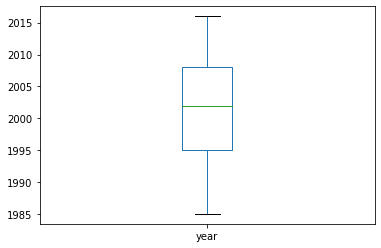

In [4]:
df["year"].plot.box()

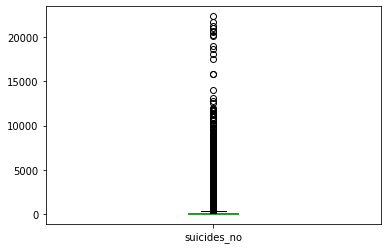

In [5]:
df["suicides_no"].plot.box()

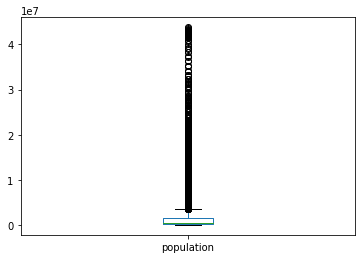

In [6]:
df["population"].plot.box()

In [ ]:
df["suicides/100k pop"].plot.box()

In [ ]:
df["gdp_per_capita ($)"].plot.box()

## Transform Data
we choose to transform the column of population, because the data is positively skewed

In [ ]:
df['population'].hist(bins=150)

In [ ]:
# as the histogram shown above, we could see that the data for charges are positively skewed, and the scale range is incredibly large,
# so we should normalize it (using min/max scaling) then perform a data transformation
x = df[['population']].values.astype(float)

# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
df_normalized = pd.DataFrame(x_scaled)

In [ ]:
df_normalized.hist(bins=150)

In [ ]:
# we chose to do log transformation here because we do not have negative values in our dataset ,otherwise we could have done square root transformation
log_transformed_col = (df_normalized + 1).apply(np.log) # Get the log of the data

log_transformed_col.hist(bins=150) # Plot histogram

In [ ]:
the data transformation wasn't super effective due to the large skew of the data but it was 

In [ ]:
# transform data
# as the histogram shown above, we could see that the data for wind_speed are positively skewed, and the scale range is incredibly large,
# so we should normalize it (using min/max scaling) then perform a data transformation
x = df[['population']].values.astype(float)

# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
df_normalized = pd.DataFrame(x_scaled)

In [ ]:
df_normalized.hist(bins=150)

In [23]:
# we only want data from 2000 - 2010
data = df.loc[(df.year < 2011) & (df.year > 1999 )]

In [24]:
data

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
132,Albania,2000,male,25-34 years,17,232000,7.33,Albania2000,0.656,"3,632,043,908",1299,Generation X
133,Albania,2000,male,55-74 years,10,177400,5.64,Albania2000,0.656,"3,632,043,908",1299,Silent
134,Albania,2000,female,75+ years,2,37800,5.29,Albania2000,0.656,"3,632,043,908",1299,G.I. Generation
135,Albania,2000,male,75+ years,1,24900,4.02,Albania2000,0.656,"3,632,043,908",1299,G.I. Generation
136,Albania,2000,female,15-24 years,6,263900,2.27,Albania2000,0.656,"3,632,043,908",1299,Generation X
...,...,...,...,...,...,...,...,...,...,...,...,...
27767,Uzbekistan,2010,female,35-54 years,101,3339076,3.02,Uzbekistan2010,0.655,"39,332,770,929",1533,Generation X
27768,Uzbekistan,2010,male,5-14 years,48,2751752,1.74,Uzbekistan2010,0.655,"39,332,770,929",1533,Generation Z
27769,Uzbekistan,2010,female,75+ years,5,322899,1.55,Uzbekistan2010,0.655,"39,332,770,929",1533,Silent
27770,Uzbekistan,2010,female,55-74 years,16,1161422,1.38,Uzbekistan2010,0.655,"39,332,770,929",1533,Silent


In [38]:
general = data.groupby('country').sum()

In [39]:
general

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
country,,,,,,
Albania,264660,956,30706067,446.38,24.876,388020
Antigua and Barbuda,240540,8,803382,131.28,0.000,1530144
Argentina,264660,33476,391207808,1403.14,28.176,931356
Armenia,216552,592,27167246,327.53,16.428,228156
Aruba,264660,75,1008674,1079.12,0.000,3276732
...,...,...,...,...,...,...
United Arab Emirates,144540,622,36502275,94.89,19.800,3035664
United Kingdom,264660,45456,625624998,886.42,31.932,5364432
United States,264660,367309,3032162369,1644.61,32.268,6129240


In [40]:
gender = data.groupby(['country', 'sex']).sum()

In [41]:
gender

year  suicides_no  population  \
country             sex                                       
Albania             female  132330          344    15402799   
                    male    132330          612    15303268   
Antigua and Barbuda female  120270            0      422197   
                    male    120270            8      381185   
Argentina           female  132330         6904   200606407   
...                            ...          ...         ...   
United States       male    132330       291687  1488900905   
Uruguay             female  132330         1302    17603261   
                    male    132330         4665    16283433   
Uzbekistan          female   96204         3131    94360544   
                    male     96204         9029    93116262   

                            suicides/100k pop  HDI for year  \
country             sex                                       
Albania             female             163.41        12.438   
                    male               282.97        12.438   
Antigua and Barbuda female               0.00         0.000   
                    male               131.28         0.000   
Argentina           female             233.46        14.088   
...                                       ...           ...   
United States       male              1364.29        16.134   
Uruguay             female             478.66        13.668   
                    male              2366.60        13.668   
Uzbekistan          female             172.42        11.244   
                    male               501.09        11.244   

                            gdp_per_capita ($)  
country             sex                         
Albania             female              194010  
                    male                194010  
Antigua and Barbuda female              765072  
                    male                765072  
Argentina           female              465678  
...                                        ...  
United States       male               3064620  
Uruguay             female              477480  
                    male                477480  
Uzbekistan          female               36006  
                    male                 36006  

[190 rows x 6 columns]

In [77]:
age = data.groupby(['country', 'sex', 'age']).sum()

In [78]:
age

year  suicides_no  population  \
country    sex    age                                           
Albania    female 15-24 years  22055          102     3043003   
                  25-34 years  22055           57     2247305   
                  35-54 years  22055          107     4200481   
                  5-14 years   22055            9     3029202   
                  55-74 years  22055           45     2298317   
...                              ...          ...         ...   
Uzbekistan male   25-34 years  16034         2238    16366771   
                  35-54 years  16034         3311    21278758   
                  5-14 years   16034          359    24871436   
                  55-74 years  16034          844     6798186   
                  75+ years    16034           95     1163669   

                               suicides/100k pop  HDI for year  \
country    sex    age                                            
Albania    female 15-24 years              36.58         2.073   
                  25-34 years              27.70         2.073   
                  35-54 years              27.93         2.073   
                  5-14 years                3.33         2.073   
                  55-74 years              21.38         2.073   
...                                          ...           ...   
Uzbekistan male   25-34 years             111.42         1.874   
                  35-54 years             127.23         1.874   
                  5-14 years               11.54         1.874   
                  55-74 years             101.09         1.874   
                  75+ years                71.06         1.874   

                               gdp_per_capita ($)  
country    sex    age                              
Albania    female 15-24 years               32335  
                  25-34 years               32335  
                  35-54 years               32335  
                  5-14 years                32335  
                  55-74 years               32335  
...                                           ...  
Uzbekistan male   25-34 years                6001  
                  35-54 years                6001  
                  5-14 years                 6001  
                  55-74 years                6001  
                  75+ years                  6001  

[1140 rows x 6 columns]

In [66]:
#age.get_group(('Albania', 'female', '15-24 years'))

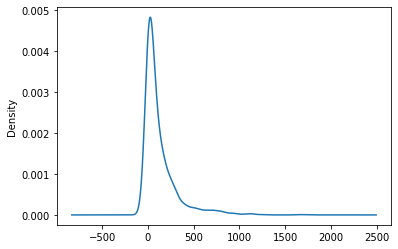

In [106]:
age['suicides/100k pop'].plot.density()

In [115]:
for rows in age['suicides/100k pop']:
    print (rows)

36.58
27.7
27.93
3.3300000000000005
21.38
46.49
35.739999999999995
63.74
59.26
8.2
54.260000000000005
61.77
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
46.17
0.0
85.11
0.0
52.989999999999995
34.839999999999996
42.97
7.81
48.949999999999996
45.90000000000001
196.10000000000002
166.73999999999998
148.47000000000003
11.479999999999999
227.57000000000005
419.32
2.8
5.25
9.48
1.7
17.700000000000003
27.53
17.04
25.840000000000003
39.41
3.99
70.31
106.48
29.65
14.28
40.269999999999996
0.0
33.28
133.42
32.37
226.11
181.02
0.0
199.58
189.14
47.01
64.93999999999998
71.59
2.41
53.75999999999999
48.86
163.56
259.15
249.35
4.29
174.82
240.54
42.06
53.120000000000005
101.46
3.6500000000000004
134.61
207.45
193.97000000000003
222.11
318.26
5.38
424.51000000000005
941.8
3.9
5.66
4.9399999999999995
1.17
9.920000000000002
20.61
13.49
15.27
21.619999999999997
5.1899999999999995
25.240000000000002
24.1
10.17
3.72
5.85
0.0
10.45
0.0
30.34
31.169999999999998
45.15
6.970000000000001
4.72
32.36
20.86
38.49999999999999
23

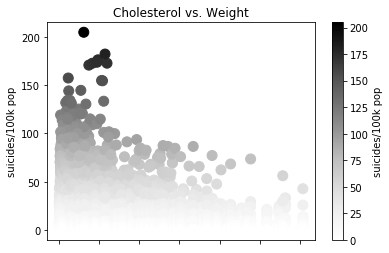

In [124]:
data.plot(kind='scatter', x='gdp_per_capita ($)', y='suicides/100k pop', c='suicides/100k pop',s=100,title="Cholesterol vs. Weight")

In [143]:
test = data[['year','suicides/100k pop','sex']]

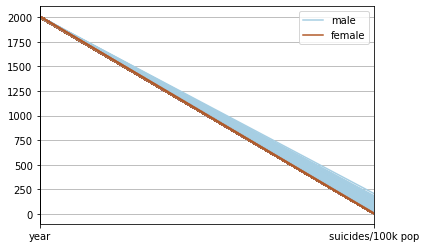

In [154]:
from pandas.plotting import parallel_coordinates
parallel_coordinates(test, 'sex', colormap='Paired')

## country,	year,sex,	age,gdp_per_capita


estimate suicides/100k pop


In [155]:
data

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
132,Albania,2000,male,25-34 years,17,232000,7.33,Albania2000,0.656,"3,632,043,908",1299,Generation X
133,Albania,2000,male,55-74 years,10,177400,5.64,Albania2000,0.656,"3,632,043,908",1299,Silent
134,Albania,2000,female,75+ years,2,37800,5.29,Albania2000,0.656,"3,632,043,908",1299,G.I. Generation
135,Albania,2000,male,75+ years,1,24900,4.02,Albania2000,0.656,"3,632,043,908",1299,G.I. Generation
136,Albania,2000,female,15-24 years,6,263900,2.27,Albania2000,0.656,"3,632,043,908",1299,Generation X
...,...,...,...,...,...,...,...,...,...,...,...,...
27767,Uzbekistan,2010,female,35-54 years,101,3339076,3.02,Uzbekistan2010,0.655,"39,332,770,929",1533,Generation X
27768,Uzbekistan,2010,male,5-14 years,48,2751752,1.74,Uzbekistan2010,0.655,"39,332,770,929",1533,Generation Z
27769,Uzbekistan,2010,female,75+ years,5,322899,1.55,Uzbekistan2010,0.655,"39,332,770,929",1533,Silent
27770,Uzbekistan,2010,female,55-74 years,16,1161422,1.38,Uzbekistan2010,0.655,"39,332,770,929",1533,Silent


In [157]:
data.corr()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
year,1.000000,-0.007965,0.013201,-0.047068,0.186157,0.238403
suicides_no,-0.007965,1.000000,0.615756,0.307751,0.148593,0.050192
population,0.013201,0.615756,1.000000,0.017928,0.099058,0.069971
suicides/100k pop,-0.047068,0.307751,0.017928,1.000000,0.092130,-0.015579
HDI for year,0.186157,0.148593,0.099058,0.092130,1.000000,0.795616
gdp_per_capita ($),0.238403,0.050192,0.069971,-0.015579,0.795616,1.000000


In [164]:
def label_encode(df, columns):
    for col in columns:
        le = LabelEncoder()
        col_values_unique = list(df[col].unique())
        le_fitted = le.fit(col_values_unique)
 
        col_values = list(df[col].values)
        #le.classes_
        col_values_transformed = le.transform(col_values)
        df[col] = col_values_transformed

In [165]:
features = df[['year','gdp_per_capita ($)','sex', 'age', 'country']]

label_encode(features, features.columns.values)

target = df[['suicides/100k pop']]
label_encode(target, target.columns.values)


C:\Users\paige\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [166]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size = 0.33, random_state = 10)


## Naive Bayes

In [167]:
nb = GaussianNB()
nb.fit(features_train, target_train)
target_pred = nb.predict(features_test)
target_pred

C:\Users\paige\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([ 686, 1163, 3365, ..., 2334, 2678, 1391], dtype=int64)

In [168]:
from sklearn import metrics
print(metrics.accuracy_score(target_test, target_pred))

0.030062084740224378


In [169]:
print(metrics.roc_auc_score(target_test, target_pred))

ValueError: multiclass format is not supported

In [183]:
from sklearn.preprocessing import LabelBinarizer, LabelEncoder, OneHotEncoder
from sklearn.metrics import roc_auc_score

def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)

In [184]:
multiclass_roc_auc_score(target_test, target_pred)

0.5002358344582547

## SVM

In [185]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.20, random_state=1)

In [ ]:
# from sklearn import svm

# # instantiate model
# model = svm.SVC() 

# # fit model
# model.fit(features_train, target_train)

C:\Users\paige\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\paige\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [ ]:
# make class predictions for the testing set
target_pred = model.predict(features_test)
target_pred

In [ ]:
# calculate accuracy
from sklearn import metrics
print(metrics.accuracy_score(target_test, target_pred))

In [ ]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities
print(metrics.roc_auc_score(target_test, target_pred))

## KNN

In [28]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.20, random_state=1)

NameError: name 'features' is not defined

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# instantiate model
model = KNeighborsClassifier(n_neighbors=2)

# fit model
model.fit(features_train, target_train)

In [ ]:
# make class predictions for the testing set
target_pred = model.predict(features_test)
target_pred

In [ ]:
# calculate accuracy
from sklearn import metrics
print(metrics.accuracy_score(target_test, target_pred))

In [ ]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities
print(metrics.roc_auc_score(target_test, target_pred))

## Random forest

In [ ]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.20, random_state=1)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# instantiate model
model = RandomForestClassifier(random_state=1, max_depth=10)

# fit model
model.fit(features_train, target_train)

In [ ]:
# make class predictions for the testing set
target_pred = model.predict(features_test)
target_pred

In [ ]:
# calculate accuracy
from sklearn import metrics
print(metrics.accuracy_score(target_test, target_pred))

In [ ]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities
print(metrics.roc_auc_score(target_test, target_pred))

**Let's see how well our model will hold up with k-fold cross validation**

In [ ]:
from sklearn.model_selection import KFold # import KFold
from sklearn.model_selection import cross_val_score, cross_val_predict

In [ ]:
# Retrain model on the whole dataset
model.fit(features, target)

In [ ]:
# Perform 10-fold cross validation
kf = KFold(n_splits=10, random_state=1, shuffle=False)
scores = cross_val_score(model, features, target, cv=kf)
print('Cross-validated scores:', scores)


In [ ]:
print(scores.mean())

In [ ]:
# Make cross validated predictions
pred = cross_val_predict(model, features, target, cv=kf)
pred